In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#read in the training data and look at the first 10 rows
originalTrain = pd.read_csv('train.csv')
originalTrain.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [2]:
#suppress warnings for presentation purposes
import warnings
warnings.filterwarnings("ignore")

In [3]:
#looking at the number of feature's non-null values and type
originalTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#seeing the total null values for each feature
originalTrain.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#checking the number of unique values for each feature
originalTrain.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [6]:
#checking the unique feature values for Embarked
originalTrain['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
#check the rows where Embarked is unknown
originalTrain.loc[originalTrain['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


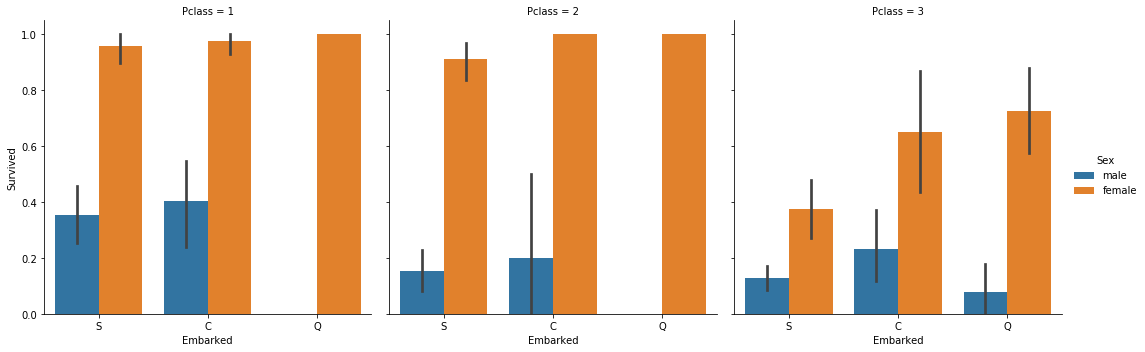

In [8]:
#Likelihood of survival for the different travel classes based on embarked location and sex
sns.factorplot(x = 'Embarked', y = 'Survived', data = originalTrain, kind = 'bar', hue = 'Sex', col = 'Pclass')

In [9]:
#for now, classifying the two unknown Embarked values as Q based on the above graph
originalTrain.at[61, 'Embarked'] =  'Q'
originalTrain.at[829, 'Embarked'] = 'Q'
originalTrain['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [10]:
#producing a feature with solely the cabin letters
originalTrain['Cabin Letter'] = [x[0] if type(x)== str else float('nan') for x in originalTrain['Cabin']]
originalTrain['Cabin Letter'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

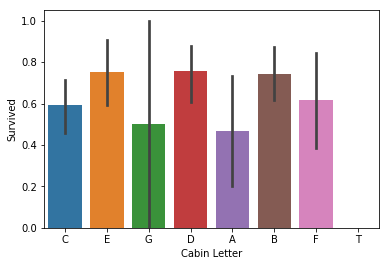

In [11]:
#probability of survival based on Cabin Letter
sns.barplot(x='Cabin Letter',y='Survived',data=originalTrain)

In [12]:
#drop features that have too many missing values or don't seem relevant for prediction
manipTrain = originalTrain.drop(['Cabin Letter','Cabin','PassengerId','Ticket'], axis = 1)

In [13]:
#change Sex into binary classifier with male as 1 and female as 0
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
sex1hot = encoder.fit_transform(manipTrain['Sex'])

In [14]:
#add the array with binary classification of male and female to the training set
manipTrain['Binary Sex'] = sex1hot
#confirm that binary classification of sex was performed correctly
manipTrain.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [15]:
#dropping the original Sex feature
manipTrain.drop('Sex',axis = 1, inplace = True)

In [16]:
#From Name feature, extract the Title of the individual
manipTrain['Title'] = [line.split(",")[1].split(".")[0][1:] for line in manipTrain['Name']]
manipTrain.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,S,1,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,C,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,S,0,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,S,0,Mrs
4,0,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,S,1,Mr


In [17]:
#all unique values for the Title feature
manipTrain['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [18]:
#checking the number of unique values in Title feature
manipTrain['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
the Countess      1
Lady              1
Jonkheer          1
Don               1
Mme               1
Capt              1
Sir               1
Name: Title, dtype: int64

In [19]:
#drop the original Name feature
manipTrain.drop('Name', axis = 1, inplace = True)

In [20]:
#find the row that uses the Countess as its value for the Title feature
manipTrain.loc[manipTrain['Title'] == 'the Countess']

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
759,1,1,33.0,0,0,86.5,S,0,the Countess


In [21]:
#find the indices where the value for Title is the Countess
countess = manipTrain.index[manipTrain['Title'] == 'the Countess'].tolist()
print(countess)

[759]


In [22]:
#recategorizing some of the values from Title feature
for i in countess:
    manipTrain.at[i, 'Title'] = 'Nobility'
jonkheer = manipTrain.index[manipTrain['Title'] == 'Jonkheer'].tolist()
for i in jonkheer:
    manipTrain.at[i, 'Title'] = 'Nobility'
mme = manipTrain.index[manipTrain['Title'] == 'Mme'].tolist()
for i in mme:
    manipTrain.at[i, 'Title'] = 'Mrs'
mlle = manipTrain.index[manipTrain['Title'] == 'Mlle'].tolist()
for i in mlle:
    manipTrain.at[i, 'Title'] = 'Miss'
ms = manipTrain.index[manipTrain['Title'] == 'Ms'].tolist()
for i in ms:
    manipTrain.at[i, 'Title'] = 'Miss'
don = manipTrain.index[manipTrain['Title'] == 'Don'].tolist()
for i in don:
    manipTrain.at[i, 'Title'] = 'Nobility'
lady = manipTrain.index[manipTrain['Title'] == 'Lady'].tolist()
for i in lady:
    manipTrain.at[i, 'Title'] = 'Nobility'
sir = manipTrain.index[manipTrain['Title'] == 'Sir'].tolist()
for i in sir:
    manipTrain.at[i, 'Title'] = 'Nobility'
capt = manipTrain.index[manipTrain['Title'] == 'Capt'].tolist()
for i in capt:
    manipTrain.at[i, 'Title'] = 'Military'
major = manipTrain.index[manipTrain['Title'] == 'Major'].tolist()
for i in major:
    manipTrain.at[i, 'Title'] = 'Military'
col = manipTrain.index[manipTrain['Title'] == 'Col'].tolist()
for i in col:
    manipTrain.at[i, 'Title'] = 'Military'
    
'''
#another way to try and do this
df['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

df['Title'] = df['Title'].replace('Mlle', 'Miss')
df['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
df.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') 
             & (df.Title !=  'Mrs')] = 'Others'
             
             
#dummy, one hot encoding
df = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)
'''

"\n#another way to try and do this\ndf['Title'] = df.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())\n\ndf['Title'] = df['Title'].replace('Mlle', 'Miss')\ndf['Title'] = df['Title'].replace(['Mme','Lady','Ms'], 'Mrs')\ndf.Title.loc[ (df.Title !=  'Master') & (df.Title !=  'Mr') & (df.Title !=  'Miss') \n             & (df.Title !=  'Mrs')] = 'Others'\n             \n             \n#dummy, one hot encoding\ndf = pd.concat([df, pd.get_dummies(df['Title'])], axis=1).drop(labels=['Name'], axis=1)\n"

In [23]:
#checking the number of unique values in Title feature
manipTrain['Title'].value_counts()

Mr          517
Miss        185
Mrs         126
Master       40
Dr            7
Rev           6
Military      5
Nobility      5
Name: Title, dtype: int64

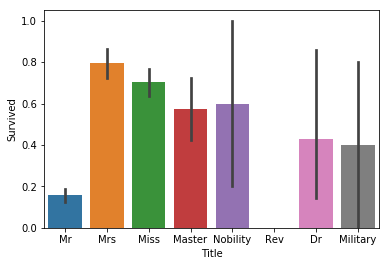

In [24]:
#bar plot of Title and probability of Survival
sns.barplot(x='Title',y='Survived',data=manipTrain)

In [25]:
#looking at the first 10 rows again
manipTrain.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,0,3,22.0,1,0,7.2500,S,1,Mr
1,1,1,38.0,1,0,71.2833,C,0,Mrs
2,1,3,26.0,0,0,7.9250,S,0,Miss
3,1,1,35.0,1,0,53.1000,S,0,Mrs
4,0,3,35.0,0,0,8.0500,S,1,Mr
5,0,3,NaN,0,0,8.4583,Q,1,Mr
6,0,1,54.0,0,0,51.8625,S,1,Mr
7,0,3,2.0,3,1,21.0750,S,1,Master
8,1,3,27.0,0,2,11.1333,S,0,Mrs
9,1,2,14.0,1,0,30.0708,C,0,Mrs


In [26]:
#seeing the total null values for each feature
manipTrain.isnull().sum()

Survived        0
Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        0
Binary Sex      0
Title           0
dtype: int64

In [27]:
#description of each feature in manipTrain dataframe
manipTrain.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Binary Sex
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [28]:
#drop Survived feature for training
preTrain = manipTrain.drop('Survived',axis=1)

In [29]:
preTrain.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,22.0,1,0,7.2500,S,1,Mr
1,1,38.0,1,0,71.2833,C,0,Mrs
2,3,26.0,0,0,7.9250,S,0,Miss
3,1,35.0,1,0,53.1000,S,0,Mrs
4,3,35.0,0,0,8.0500,S,1,Mr


# Pipeline Training Data

In [30]:
#used from https://jorisvandenbossche.github.io/blog/2018/05/28/scikit-learn-columntransformer/
#import necessary libaries
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

In [31]:
#Imputer uses median value instead of null values in Age feature
#StandardScaler standardizes the Age and Fare features
#OneHotEncoder, ignore previously unseen values when transforming the test set; add columns to turn
#the categorical values into binary features
preprocess = make_column_transformer(
    (['Age','Fare'], make_pipeline(SimpleImputer(missing_values=np.nan, strategy='mean'),StandardScaler())),
    (['Pclass','SibSp','Parch','Embarked','Binary Sex','Title'], OneHotEncoder(handle_unknown='ignore')))
readyForTrain = preprocess.fit_transform(preTrain)


/anaconda3/lib/python3.7/site-packages/sklearn/compose/_column_transformer.py:732: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [32]:
#shape of the transformed data
readyForTrain.shape

(891, 32)

In [33]:
#check type of transformed dat (should be a sparse matrix)
type(readyForTrain)

scipy.sparse.csr.csr_matrix

In [34]:
#transform sparse matrix into a pandas DataFrame
trainDf = pd.DataFrame(readyForTrain.todense())
print(trainDf.head())

         0         1    2    3    4    5    6    7    8    9   ...   22   23  \
0 -0.592481 -0.502445  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  0.0  1.0   
1  0.638789  0.786845  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
2 -0.284663 -0.488854  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  1.0  0.0   
3  0.407926  0.420730  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  1.0  0.0   
4  0.407926 -0.486337  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0  1.0   

    24   25   26   27   28   29   30   31  
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
2  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  

[5 rows x 32 columns]


In [35]:
import tensorflow as tf
#tf.keras, a high-level API to build and train models in TensorFlow
from tensorflow import keras

In [36]:
#splitting the training data into a training set and a validation set
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(trainDf, manipTrain['Survived'], random_state=42)

In [37]:
#check the shape of the independent variables training set
X_train.shape

(668, 32)

In [38]:
#check the shape of the independent variables validation set
X_val.shape

(223, 32)

In [39]:
#checking to see that the independent variables validation set is a dataframe
X_val.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
709,0.000000,-0.341452,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
439,0.100109,-0.437007,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
840,-0.746389,-0.488854,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
720,-1.823750,0.016023,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
39,-1.208115,-0.422074,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [40]:
#checking to see the shape of the dependent variables training set
Y_train.shape

(668,)

In [41]:
#checking to see that the dependent variables validation set is a Series
Y_val.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

In [42]:
#return a numpy representation of the DataFrame
X_train = X_train.values
X_val = X_val.values
Y_train = Y_train.values
Y_val = Y_val.values

In [43]:
#checking to see that the dependendent variable validation set is now a numpy array
type(Y_val)

numpy.ndarray

In [44]:
#convert from a rank one array to a 2D array that is (n,1)
Y_val = np.reshape(Y_val, (-1, 1))
Y_train = np.reshape(Y_train,(-1,1))

In [45]:
#checking to see the shape of the dependent variables training set
Y_train.shape

(668, 1)

# Preparing Test Data

In [46]:
#import test data
testData = pd.read_csv('test.csv')
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [47]:
#remove same features as training set
preTest = testData.drop(['PassengerId','Cabin','Ticket'],axis = 1)

In [48]:
#change Sex into binary classifier with male as 1 and female as 0; use encoder from training set
testsex1hot = encoder.transform(preTest['Sex'])
preTest['Binary Sex'] = testsex1hot
preTest.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Binary Sex
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [49]:
#drop original Sex feature
preTest.drop('Sex', axis=1, inplace = True)

In [50]:
preTest['Title'] = [line.split(",")[1].split(".")[0][1:] for line in preTest['Name']]
preTest.head()

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,"Kelly, Mr. James",34.5,0,0,7.8292,Q,1,Mr
1,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,7.0000,S,0,Mrs
2,2,"Myles, Mr. Thomas Francis",62.0,0,0,9.6875,Q,1,Mr
3,3,"Wirz, Mr. Albert",27.0,0,0,8.6625,S,1,Mr
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,12.2875,S,0,Mrs


In [51]:
preTest.drop('Name',axis=1,inplace=True)
preTest.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Binary Sex,Title
0,3,34.5,0,0,7.8292,Q,1,Mr
1,3,47.0,1,0,7.0000,S,0,Mrs
2,2,62.0,0,0,9.6875,Q,1,Mr
3,3,27.0,0,0,8.6625,S,1,Mr
4,3,22.0,1,1,12.2875,S,0,Mrs


In [52]:
preTest['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dona        1
Dr          1
Name: Title, dtype: int64

In [53]:
#recategorizing some of the values from Title feature
ms = preTest.index[preTest['Title'] == 'Ms'].tolist()
for i in ms:
    preTest.at[i, 'Title'] = 'Miss'
dona = preTest.index[preTest['Title'] == 'Dona'].tolist()
for i in dona:
    preTest.at[i, 'Title'] = 'Nobility'
col = preTest.index[preTest['Title'] == 'Col'].tolist()
for i in col:
    preTest.at[i, 'Title'] = 'Military'

In [54]:
preTest['Title'].value_counts()

Mr          240
Miss         79
Mrs          72
Master       21
Rev           2
Military      2
Nobility      1
Dr            1
Name: Title, dtype: int64

In [55]:
#check the features with null values
preTest.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Embarked       0
Binary Sex     0
Title          0
dtype: int64

In [56]:
#use the preprocess from the training set
readyForTest = preprocess.transform(preTest)

In [57]:
#create a DataFrame from a sparse matrix
testDf = pd.DataFrame(readyForTest.todense())
print(testDf)

           0         1    2    3    4    5    6    7    8    9   ...   22  \
0    0.369449 -0.490783  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
1    1.331378 -0.507479  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0   
2    2.485693 -0.453367  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
3   -0.207709 -0.474005  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
4   -0.592481 -0.401017  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  ...  1.0   
5   -1.208115 -0.462679  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
6    0.023154 -0.494810  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  1.0   
7   -0.284663 -0.064516  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0  ...  0.0   
8   -0.900298 -0.502864  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  1.0   
9   -0.669435 -0.162169  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0   
10   0.000000 -0.489442  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   
11   1.254424 -0.124920  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  ...  0.0   

In [58]:
#check the shape of the test Dataframe
testDf.shape

(418, 32)

# Build L2 Regularization Neural Network

In [59]:
#Building a neural network model using keras where the first three layers have 128, 64, and 32 nodes, respectively, 
#using a relu activation function and different L2 regularization values.
#Output layer is a single node using the sigmoid activation function in order to classify Titanic passengers
#as survived or did not survive.
model = keras.Sequential([
    keras.layers.Dense(128, kernel_regularizer=keras.regularizers.l2(0.1),
                       input_dim = X_train.shape[1], activation=tf.nn.relu),
    keras.layers.Dense(64, kernel_regularizer=keras.regularizers.l2(0.15), activation=tf.nn.relu),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid')
])

W0822 12:24:02.841892 4533437888 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [60]:
#Compiling model based on accuracy using the adam optimizer for training.
#Cross-entropy loss measures the performance of a classification model whose output is a 
#probability value between 0 and 1. Cross-entropy loss increases as the predicted probability 
#diverges from the actual label (https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0822 12:24:02.961145 4533437888 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [61]:
#trains the model for 80 epochs, validating on the independent/dependent validation sets
history = model.fit(X_train,Y_train, batch_size=None, epochs=80, validation_data=(X_val, Y_val), verbose=0)

In [62]:
#grabbing the record of training/validation loss values and metrics values at successive epochs
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [63]:
#grabbing the dictionary keys and putting them into variables
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#number of epochs
epochs = range(1, len(acc) + 1)

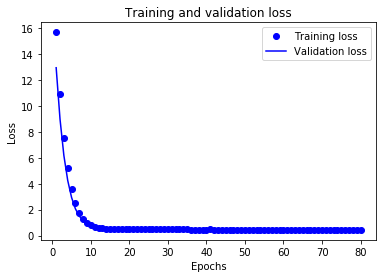

In [64]:
#plotting the training and validation loss for each epoch

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

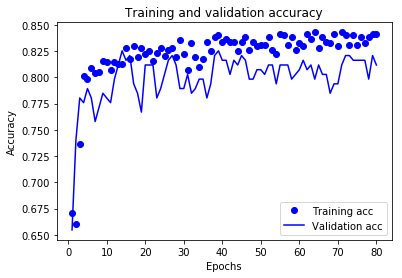

In [65]:
plt.clf()   # clear figure

#plotting the training and validation accuracy for each epoch

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediction for L2 Regularization Neural Network

In [66]:
#generates output predictions of survived or did not survive for each Titanic passenger in the test DataFrame
prediction = model.predict_classes(testDf)

In [67]:
#check shape of prediction DataFrame
prediction.shape

(418, 1)

In [68]:
#prepare for Kaggle submission
testFinal = testData[['PassengerId']]
testFinal['Survived'] = prediction

In [69]:
#exporting to csv file for Kaggle submission
testFinal.to_csv('2019TitanicNeuralNetwork.csv', index = False)
#score with regularization 0.79904 (correct Survival prediction of 79.904%)

# Build Dropout Regularization Neural Network

In [70]:
#Building a neural network model using keras where the first three layers have 128, 64, and 32 nodes, respectively, 
#using a relu activation function and a dropout of 0.5.
#Output layer is a single node using the sigmoid activation function in order to classify Titanic passengers
#as survived or did not survive.
model = keras.Sequential([
    keras.layers.Dense(128,input_dim = X_train.shape[1], activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

In [71]:
#Compiling model based on accuracy using the adam optimizer for training.
#Cross-entropy loss measures the performance of a classification model whose output is a 
#probability value between 0 and 1. Cross-entropy loss increases as the predicted probability 
#diverges from the actual label (https://ml-cheatsheet.readthedocs.io/en/latest/loss_functions.html)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [72]:
#trains the model for 80 epochs with a batch size of 128, validating on the independent/dependent validation sets
history = model.fit(X_train,Y_train, batch_size = 128, epochs=80, validation_data=(X_val, Y_val), verbose=1)

Train on 668 samples, validate on 223 samples
Epoch 1/80
668/668 [==============================] - 0s 423us/sample - loss: 0.7048 - acc: 0.5374 - val_loss: 0.6646 - val_acc: 0.6368
Epoch 2/80
668/668 [==============================] - 0s 22us/sample - loss: 0.6641 - acc: 0.6078 - val_loss: 0.6347 - val_acc: 0.6592
Epoch 3/80
668/668 [==============================] - 0s 22us/sample - loss: 0.6519 - acc: 0.6527 - val_loss: 0.6118 - val_acc: 0.6637
Epoch 4/80
668/668 [==============================] - 0s 26us/sample - loss: 0.6202 - acc: 0.6647 - val_loss: 0.5897 - val_acc: 0.6951
Epoch 5/80
668/668 [==============================] - 0s 24us/sample - loss: 0.6298 - acc: 0.6512 - val_loss: 0.5690 - val_acc: 0.7130
Epoch 6/80
668/668 [==============================] - 0s 21us/sample - loss: 0.6169 - acc: 0.6662 - val_loss: 0.5557 - val_acc: 0.7578
Epoch 7/80
668/668 [==============================] - 0s 23us/sample - loss: 0.5978 - acc: 0.6931 - val_loss: 0.5442 - val_acc: 0.7937
Epoch 8/

Epoch 61/80
668/668 [==============================] - 0s 21us/sample - loss: 0.3946 - acc: 0.8458 - val_loss: 0.4563 - val_acc: 0.8251
Epoch 62/80
668/668 [==============================] - 0s 19us/sample - loss: 0.4008 - acc: 0.8458 - val_loss: 0.4537 - val_acc: 0.8206
Epoch 63/80
668/668 [==============================] - 0s 19us/sample - loss: 0.3871 - acc: 0.8428 - val_loss: 0.4528 - val_acc: 0.8206
Epoch 64/80
668/668 [==============================] - 0s 21us/sample - loss: 0.4013 - acc: 0.8428 - val_loss: 0.4526 - val_acc: 0.8206
Epoch 65/80
668/668 [==============================] - 0s 21us/sample - loss: 0.3939 - acc: 0.8368 - val_loss: 0.4522 - val_acc: 0.8206
Epoch 66/80
668/668 [==============================] - 0s 20us/sample - loss: 0.3844 - acc: 0.8518 - val_loss: 0.4492 - val_acc: 0.8161
Epoch 67/80
668/668 [==============================] - 0s 21us/sample - loss: 0.3968 - acc: 0.8503 - val_loss: 0.4501 - val_acc: 0.8161
Epoch 68/80
668/668 [===========================

In [73]:
#grabbing the record of training/validation loss values and metrics values at successive epochs
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [74]:
#grabbing the dictionary keys and putting them into variables
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#number of epochs
epochs = range(1, len(acc) + 1)

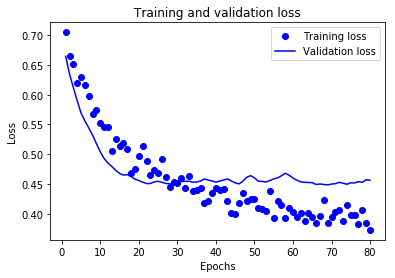

In [75]:
#plotting the training and validation loss for each epoch

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

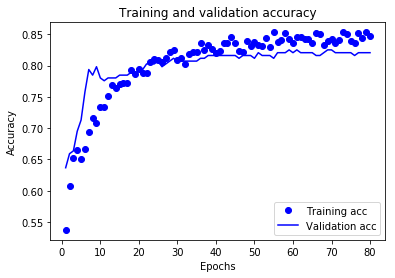

In [76]:
plt.clf()   # clear figure

#plotting the training and validation accuracy for each epoch

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediction for Dropout Regularization Neural Network

In [77]:
#generates output predictions of survived or did not survive for each Titanic passenger in the test DataFrame
prediction = model.predict_classes(testDf)

In [78]:
#check shape of prediction DataFrame
prediction.shape

(418, 1)

In [79]:
#prepare for Kaggle submission
testFinal = testData[['PassengerId']]
testFinal['Survived'] = prediction

In [80]:
#exporting to csv file for Kaggle submission
testFinal.to_csv('2019TitanicDropout.csv', index = False)
#score without dropout 0.79425 (correct Survival prediction of 79.425%)

# Using Random Search for Neural Network

In [81]:
#import libraries necessary for random search
from sklearn.model_selection import RandomizedSearchCV
from numpy.random import seed
from tensorflow import set_random_seed

In [82]:
#use a create_model function with default values for use with random search
def create_model(layers = [128,64,32], act = 'relu', opt = 'adam', lr = 0.0):    
    model = keras.models.Sequential()
    
    # create first hidden layer
    model.add(keras.layers.Dense(layers[0], input_dim = X_train.shape[1], 
                                 kernel_regularizer=keras.regularizers.l2(lr),activation=act))
    
    # create additional hidden layers
    for i in range(1,len(layers)):
        model.add(keras.layers.Dense(layers[i], kernel_regularizer=keras.regularizers.l2(lr), activation=act))
    
    # create output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # output layer
    
    #configure model for training
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [83]:
#create the model for random search
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

In [84]:
#creating the dictionary with parameters names (string) as keys and lists of parameters to try
batch_size = [16, 32, 64, 128, 256]
epochs = range(10,100)
lr = np.arange(0.0, 1.0, 0.03)
optimizer = ['RMSprop', 'Adagrad','Adam',]
layers = [[128,64,32],[64,64,64],[32,25,12],[25,25],[25,12],[12]]

param_dist = dict(batch_size=batch_size, epochs=epochs, lr=lr, opt = optimizer, layers = layers)

In [85]:
#creating the variable to perform the Random Search using accuracy to evaluate predictions on the test set,
#using 100 different iterations, 5-fold cross validation, and running 2 jobs in parallel
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, scoring = 'accuracy',n_iter=100, cv=5, n_jobs=2,
                                   verbose = 0, random_state = 0)

In [88]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
random_search.fit(X_train, Y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


CPU times: user 3.91 s, sys: 1.05 s, total: 4.96 s
Wall time: 7min 42s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x1a2f3ec4e0>,
          fit_params=None, iid='warn', n_iter=100, n_jobs=2,
          param_distributions={'batch_size': [16, 32, 64, 128, 256], 'epochs': range(10, 100), 'lr': array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3 ,
       0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.51, 0.54, 0.57, 0.6 , 0.63,
       0.66, 0.69, 0.72, 0.75, 0.78, 0.81, 0.84, 0.87, 0.9 , 0.93, 0.96,
       0.99]), 'opt': ['RMSprop', 'Adagrad', 'Adam'], 'layers': [[128, 64, 32], [64, 64, 64], [32, 25, 12], [25, 25], [25, 12], [12]]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [89]:
#the best parameters found from the random search
random_search.best_params_

{'opt': 'Adam',
 'lr': 0.03,
 'layers': [32, 25, 12],
 'epochs': 58,
 'batch_size': 32}

In [90]:
#the best accuracy score using the best parameters
print(random_search.best_score_)

0.8263473053892215


# Perform Another Random Search Based On Previous Random Search

In [106]:
#creating the dictionary with parameters names (string) as keys and lists of parameters to try
batch_size = [32, 64, 128]
epochs = range(50,100)
lr = np.arange(0.0, 0.3, 0.03)
optimizer = ['Adagrad']
layers = [[128,64,32],[85,85,85],[64,64,64],[32,25,12],[12,12,12]]

param_dist = dict(batch_size=batch_size, epochs=epochs, lr=lr, opt = optimizer, layers = layers)

In [92]:
#creating the variable to perform the Random Search using accuracy to evaluate predictions on the test set,
#using 25 different iterations, 5-fold cross validation, and running 2 jobs in parallel
random_search2 = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, scoring = 'accuracy',n_iter=25, cv=5,n_jobs=2,
                                   verbose = 0, random_state = 0)

In [93]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
random_search2.fit(X_train, Y_train)

W0822 12:38:40.133440 4533437888 deprecation.py:506] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/optimizer_v2/adagrad.py:105: calling Constant.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


CPU times: user 4.4 s, sys: 653 ms, total: 5.05 s
Wall time: 2min 3s


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
          estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x1a2f3ec4e0>,
          fit_params=None, iid='warn', n_iter=25, n_jobs=2,
          param_distributions={'batch_size': [32, 64, 128], 'epochs': range(50, 100), 'lr': array([0.  , 0.03, 0.06, 0.09, 0.12, 0.15, 0.18, 0.21, 0.24, 0.27]), 'opt': ['Adagrad'], 'layers': [[128, 64, 32], [85, 85, 85], [64, 64, 64], [32, 25, 12], [12, 12, 12]]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_score='warn', scoring='accuracy', verbose=0)

In [94]:
random_search2.best_params_

{'opt': 'Adagrad',
 'lr': 0.03,
 'layers': [128, 64, 32],
 'epochs': 84,
 'batch_size': 32}

In [95]:
print(random_search.best_score_)

0.8263473053892215


# Create Model Based on Random Search

In [96]:
#create the model with the Adagrad optimizer, relu activation function, three layers have 128, 64, and 32 nodes, 
#respectively, and a learning rate of 0.03 based on random search results
model = create_model(opt = 'Adagrad', lr = 0.03)

In [97]:
#trains the model for 84 epochs with a batch size of 32, validating on the independent/dependent validation sets,
#based on random search
history = model.fit(X_train,Y_train, batch_size = 32, epochs=84, validation_data=(X_val, Y_val), verbose=0)

In [98]:
#grabbing the record of training/validation loss values and metrics values at successive epochs
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [99]:
#grabbing the dictionary keys and putting them into variables
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#number of epochs
epochs = range(1, len(acc) + 1)

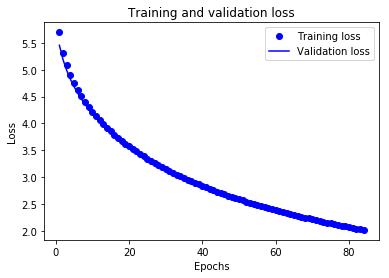

In [100]:
#plotting the training and validation loss for each epoch

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

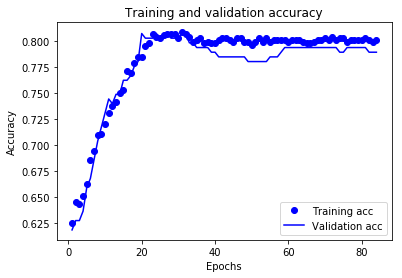

In [101]:
plt.clf()   # clear figure

#plotting the training and validation accuracy for each epoch

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediction

In [102]:
#generates output predictions of survived or did not survive for each Titanic passenger in the test DataFrame
prediction = model.predict_classes(testDf)

In [103]:
#check shape of prediction Dataframe
prediction.shape

(418, 1)

In [104]:
#prepare for Kaggle submission
testFinal = testData[['PassengerId']]
testFinal['Survived'] = prediction

In [105]:
#exporting to csv file for Kaggle submission
testFinal.to_csv('2019TitanicRandomSearch.csv', index = False)
#score without RandomSearch 0.76076 (correct Survival prediction of 76.076%)

# Randomized Search Third Try

In [ ]:
#dropout typically between 0.2 and 0.5
def create_model(layers = [128,64,32], act = 'relu', opt = 'adam', lr = 0.0):    
    model = keras.models.Sequential()
    
    # create first hidden layer
    model.add(keras.layers.Dense(layers[0], input_dim = X_train.shape[1], kernel_regularizer=keras.regularizers.l2(lr),
                    activation=act))
    
    # create additional hidden layers
    for i in range(1,len(layers)):
        model.add(keras.layers.Dense(layers[i], kernel_regularizer=keras.regularizers.l2(lr), activation=act))
    
    # create output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))  # output layer
    
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    
    return model

In [ ]:
model = tf.keras.wrappers.scikit_learn.KerasClassifier(build_fn=create_model, verbose=0)

In [ ]:
#performing a Randomized Sarch
batch_size = [16, 32, 64, 128, 256]
epochs = range(10,100)
lr = np.arange(0.0, 1.0, 0.03)
optimizer = ['RMSprop', 'Adagrad','Adam','SGD']
activation = ['relu','elu']
layers = [[128,128,128],[128,64,32],[64,64,64],[32,25,12],[25,25],[25,12],[12,12],[12]]

param_dist = dict(batch_size=batch_size, epochs=epochs, lr=lr, opt = optimizer, layers = layers, act = activation)

In [ ]:
random_search = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, scoring = 'accuracy',n_iter=100, cv=5, n_jobs=3,
                                   verbose = 0, random_state = 0)

In [ ]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
random_search.fit(trainDf, manipTrain['Survived'])

In [ ]:
random_search.best_params_

In [ ]:
print(random_search.best_score_)

In [ ]:
#performing a Randomized Search
batch_size = [64,128,256]
epochs = range(25,75)
lr = np.arange(0.0, 0.3, 0.03)
optimizer = ['adam']
layers = [[32,25,12],[25,25],[25,12],[12,12],[12,6],[8,6],[12],[8]]

param_dist = dict(batch_size=batch_size, epochs=epochs, lr=lr, opt = optimizer, layers = layers)

In [ ]:
random_search2 = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, scoring = 'accuracy',n_iter=100, cv=5, n_jobs=3,
                                   verbose = 0, random_state = 0)

In [ ]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
random_search2.fit(trainDf, manipTrain['Survived'])

In [ ]:
random_search2.best_params_

In [ ]:
print(random_search2.best_score_

In [ ]:
#performing a Randomized Sarch
batch_size = [64, 128, 256]
epochs = range(50,100)
lr = np.arange(0.0, 0.1, 0.005)
optimizer = ['Adam']
activation = ['relu','elu']
layers = [[12,6],[8,6],[6,6],[6,3],[4,4],[32],[24],[12],[8]]

param_dist = dict(batch_size=batch_size, epochs=epochs, lr=lr, opt = optimizer, layers = layers, act = activation)

In [ ]:
random_search3 = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, scoring = 'accuracy',n_iter=100, cv=5, n_jobs=2,
                                   verbose = 0, random_state = 0)

In [ ]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
random_search3.fit(trainDf, manipTrain['Survived'])

In [ ]:
random_search3.best_params_

In [ ]:
random_search3.best_score_

In [ ]:
#performing a Randomized Sarch
batch_size = [64, 128, 256]
epochs = range(50,100)
lr = np.arange(0.0, 0.02, 0.001)
optimizer = ['Adam']
activation = ['relu']
layers =[[] for x in range(0,128)]
i = 3
for layer in layers:
    layer.append(i)
    i = i +1
print(layers)

param_dist = dict(batch_size=batch_size, epochs=epochs, lr=lr, opt = optimizer, layers = layers, act = activation)

In [ ]:
random_search4 = RandomizedSearchCV(estimator=model, 
                                   param_distributions=param_dist, scoring = 'accuracy',n_iter=125, cv=5, n_jobs=3,
                                   verbose = 0, random_state = 0)

In [ ]:
%%time
#measure the amount of CPU and wall time to complete fit the random search model

# Fit the random search model
random_search4.fit(trainDf, manipTrain['Survived'])

In [ ]:
random_search4.best_params_

In [ ]:
random_search4.best_score_

In [ ]:
model = create_model(layers = [74],lr=0.001)

In [ ]:
history = model.fit(trainDf, manipTrain['Survived'], batch_size = 64, epochs=89, verbose = 1)

In [ ]:
history_dict = history.history
history_dict.keys()

In [ ]:
acc = history_dict['acc']
loss = history_dict['loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Prediction

In [ ]:
prediction = model.predict_classes(testDf)

In [ ]:
prediction.shape

In [ ]:
#prepare for Kaggle submission
testFinal = testData[['PassengerId']]
testFinal['Survived'] = prediction

In [ ]:
testFinal.to_csv('2019TitanicNeuralNetwork.csv', index = False)
#score without RandomSearch 0.76555 (correct Survival prediction of 76.555%)